<a href="https://colab.research.google.com/github/ambarja/python_intro/blob/master/gdal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install geopandas

In [ ]:
import os, gdal
from gdalconst import *
import rasterio
import geopandas as gpd
import ee
from osgeo import gdal
from google.colab import auth
from matplotlib import pyplot
import tempfile
import zipfile

In [ ]:
auth.authenticate_user()
ee.Authenticate()
ee.Initialize()

## **Unzip a shapefile**

In [ ]:
def zip_shp(zip_file, dir_output):
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
      zip_ref.extractall(dir_output)

In [ ]:
file_zip = "/content/drive/My Drive/FOREST_MAP/08_catastrominero.zip"
file_shp = "08_catastrominero.shp"
file_tif = "08_catastrominero.tif"

asset_name = "users/csaybar/forest/pred/cat"
bucket_name = "rgee_dev"

In [ ]:
zip_shp(file_zip, file_shp)

In [ ]:
shapefile_ee = gpd.read_file(file_shp)
#shapefile_ee = shapefile_ee.loc[shapefile_ee["RST_LBL"]=="informal"]
#shapefile_ee = shapefile_ee.loc[(shapefile_ee["RST_LBL"]=='Pavimentado')|(shapefile_ee["RST_LBL"]=='Afirmado')]
shapefile_ee["DN"] = 1
shapefile_ee.to_file(file_shp)

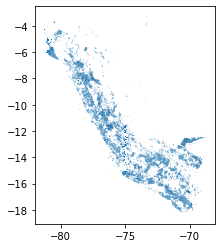

In [ ]:
shapefile_ee.plot()

In [ ]:
!gdal_rasterize -l 08_catastrominero -a DN -tr 0.009 0.009 -a_nodata 0.0 -te -80.95270741 -17.748184886 -68.712295432 -0.076512943 -ot Float64 -of GTiff {file_shp} {file_tif}

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
# from local to GCS
!gsutil cp {file_tif} gs://{bucket_name}/{file_tif}

Copying file://08_catastrominero.tif [Content-Type=image/tiff]...
/ [1 files][ 20.4 MiB/ 20.4 MiB]                                                
Operation completed over 1 objects/20.4 MiB.                                     


In [ ]:
!earthengine upload image --asset_id={asset_name}  gs://{bucket_name}/{file_tif}

Instructions for updating:
non-resource variables are not supported in the long term
Running command using Cloud API.  Set --no-use_cloud_api to go back to using the API

W0630 03:00:23.412413 140181298055040 __init__.py:46] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent ca

In [ ]:
!gdal_polygonize.py /content/cover_2020.tif  /content/OUTPUT.gpkg -b 1 -f "GPKG" OUTPUT DN

Creating output /content/OUTPUT.gpkg of format GPKG.
0...10...20...30...40...50...60...70...80...90...100 - done.
